# Lab: Random Forests

## Instructions

- Apply the Random Forests algorithm but this time only by upscaling the data.
- Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? 
- Sklearn classification models are trained to maximize the accuracy. However, another error metric will be more relevant here. Please checkout
[make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer) alongside with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) in order to train the model to maximize the error metrics of interest in this case.

**Dependent variables**
- Target_B: if the customer donated (1) or not (0)
- Target_D: amount donated


1. Predict Target_B -> class imbalance -> upscale
2. How much money costs a false negative. Compute how much money the company will lose if the customers that were going to donate the model predicted that they won't. Use target_d for this. Money that the company has lost because of a misclassification of the model.
3. Make scorer we create the scoring based on a new error metric. We want to use another error metric because accuracy is extremely sensitive to class imbalance.

In [1]:
# import libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

## Read data

In [2]:
target = pd.read_csv('files_for_lab/target.csv')
categorical = pd.read_csv('files_for_lab/categorical.csv')
numerical = pd.read_csv('files_for_lab/numerical.csv')

## Explore data

In [3]:
print("Shape of target",target.shape)
display(target.head())
print("Shape of categorical", categorical.shape)
display(categorical.head())
print("Shape of numerical", numerical.shape)
display(numerical.head())

Shape of target (95412, 2)


,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


Shape of categorical (95412, 22)


,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3


Shape of numerical (95412, 315)


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

In [4]:
categorical.dtypes
# some categorical variables are numerical

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [7]:
categorical['DOMAIN_B'].value_counts()

2    48356
1    28498
3    16754
4     1804
Name: DOMAIN_B, dtype: int64

In [5]:
donors_df = pd.concat([numerical, categorical, target], axis = 1)
donors_df['TARGET_B'].value_counts() # class imbalance

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [6]:
donors_df.columns

Index(['TCODE', 'AGE', 'INCOME', 'WEALTH1', 'HIT', 'MALEMILI', 'MALEVET',
       'VIETVETS', 'WWIIVETS', 'LOCALGOV',
       ...
       'MINRDATE_YR', 'MINRDATE_MM', 'MAXRDATE_YR', 'MAXRDATE_MM',
       'LASTDATE_YR', 'LASTDATE_MM', 'FIRSTDATE_YR', 'FIRSTDATE_MM',
       'TARGET_B', 'TARGET_D'],
      dtype='object', length=339)

In [6]:
# check if the famous "Unnamed: 0" column is in the dataframe
if 'Unnamed: 0' in donors_df.columns:
    print("Exists!")
else:
    print("It's not here")

It's not here


In [9]:
# check for missing values
donors_df.isna().sum()

TCODE           0
AGE             0
INCOME          0
WEALTH1         0
HIT             0
               ..
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
TARGET_B        0
TARGET_D        0
Length: 339, dtype: int64

## Random Forests - prediction

In [8]:
# X - y split
y = donors_df['TARGET_B']
X = donors_df.drop(['TARGET_B'], axis = 1)

# X into numerical and categorical
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

display(categoricalX.head())

# check number of unique values (labels) in each categorical variable.
# if a variable has too many categories it might be better to group them before encoding
for col in categoricalX.columns:
    print(col, categoricalX[col].nunique())

,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,IL,H,F,L,E,C,T
1,CA,H,M,L,G,A,S
2,NC,U,M,L,E,C,R
3,CA,U,F,L,E,C,R
4,FL,H,F,L,F,A,S


STATE 12
HOMEOWNR 2
GENDER 3
RFA_2R 1
RFA_2A 4
GEOCODE2 4
DOMAIN_A 5


### Encode categorical


In [9]:
# It could be interesting to group 'STATE' to reduce the number of columns when encoding the categorical variables but I'll leave it like this for now
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(categoricalX) 
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

In [10]:
X.shape

(95412, 355)

### Train-test split

In [11]:
# Train-test split before the upsampling and apply the upsampling only to the train set because the class imbalance will affect the process of training the model
# So it's not necessary to apply it to the test set -> test set must reflect the reality, which is imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [12]:
# for upsampling we need to temporarily concat X_train and y_train
trainset = pd.concat([X_train, y_train], axis=1)

# imbalce of full 'TARGET_B:
donors_df['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [13]:
trainset.shape

(76329, 356)

### Apply upsampling
- Manual or
- Using RandomOverSampler

In [14]:
# imbalance of 'TARGET_B' in train set
trainset['TARGET_B'].value_counts()

0    72442
1     3887
Name: TARGET_B, dtype: int64

In [15]:
# split TARGET_B by the two categories and upsample (manually here) category1.
category_1 = trainset[trainset['TARGET_B']==1].sample(len(trainset[trainset['TARGET_B']==0]), replace=True)
print("Rows of category 1",category_1.shape[0])

category_0 = trainset[trainset['TARGET_B']== 0]
print("Rows in category 0",category_0.shape[0])

Rows of category 1 72442
Rows in category 0 72442


In [ ]:
#from imblearn.over_sampling import RandomOverSampler 
#ros = RandomOverSampler(random_state=42)

#X_train_over, y_train_over = ros.fit_resample(X_train_scaled, y_train)
#display(pd.concat([X_train_over,y_train_over],axis=1).head())

In [16]:
# concatenate both categories
trainset_new = pd.concat([category_0, category_1], axis = 0)
trainset_new = trainset_new.sample(frac=1) #randomize the rows 

In [17]:
# Apply X/y split again
X_train = trainset_new.drop(['TARGET_B'], axis=1)
y_train = trainset_new['TARGET_B']
print(X_train.shape)

(144884, 355)


In [18]:
display(X_train.shape)
X_train.head()


(144884, 355)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
92730,1,60.000000,6,7,1,3,29,18,49,7,3,1,6,34046,9256,13729,99,0,0,48,52,93,3,1,2,2,0,0,0,0,0,0,0,2,0,0,0,31,38,42,35,43,47,25,44,37,19,14,27,19,12,12,10,6,18,19,32,18,13,22,9,20,26,35,39,21,8,2,54,12,6,28,168,245,62,55,2,34,32,31,1,1,0,745,828,5,5,66,34,95,5,4,33,67,51,23,81,19,10,2,9,15,24,6,19,58,16,1,2,0,1,4,18,49,96,0,4,38,51,52,13,4,3,30,4,4,1,28,0,34,69,92,96,5120.0,107.0,613.0,326,382,374,428,15081,17,19,18,22,17,5,1,1,0,11,15,18,26,20,7,2,1,0,24,4,47,6,46,54,8,76,13,5,5,0,0,0,3,3,1,32,19,22,2,70,71,78,65,74,63,74,58,71,97,6,14,12,5,10,23,0,1,12,0,9,6,3,3,1,0,4,22,6,2,4,16,9,4,2,1,8,6,8,5,6,5,2,4,74,8,0,120,4,10,38,19,8,14,6,5,19,2,16,6,0,0,0,15,31,1,24,20,35,12,0,1,1,17,0,0,4,2,3,2,0,0,0,4,0,3,76,95,1,1,3,93,52,14,5,25,2,8,17,33,47,53,3,0,82,1,11,3,0,2,96,4,98,99,99,10,3,6,6,30,68,6,13,160.0,14,8,5.0,20.0,10.0,2,11.428571,82857,1,2,21,12,3,1,86,1,38,4,92,10,94,12,95,10,86,10,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36661,2,77.000000,2,8,13,0,16,61,31,3,3,6,9,911,236,412,99,0,0,50,50,85,2,0,12,4,1,5,3,0,1,0,0,2,0,0,2,36,39,43,39,44,47,14,44,31,25,13,23,21,14,12,8,8,23,16,20,21,20,23,9,21,29,40,31,14,4,0,47,10,6,38,153,221,69,69,1,30,30,27,0,0,0,4947,4986,11,10,63,37,93,7,0,22,57,44,17,72,28,5,2,3,24,27,14,9,60,16,0,1,0,99,99,99,99,99,96,6,46,53,52,13,4,14,17,0,13,3,21,0,92,95,98,98,4480.0,13.0,803.0,586,608,682,748,33685,10,9,11,10,18,24,0,6,13,10,12,4,12,15,20,0,6,21,26,0,55,6,34,66,13,73,9,2,2,0,0,2,10,6,0,0,17,21,0,60,73,81,64,79,64,47,52,0,99,4,37,13,3,19,10,0,0,7,0,8,1,2,0,0,0,6,5,1,2,5,20,11,5,0,10,13,2,14,5,3,3,6,21,66,3,0,160,6,7,16,12,7,30,22,8,16,3,6,14,0,0,0,11,16,6,61,8,31,0,1,5,2,5,0,1,0,4,1,6,0,3,0,1,0,19,38,68,2,3,27,96,67,19,6,51,0,0,4,4,9,91,5,0,92,0,8,0,0,0,99,0,99,99,99,18,2,6,3,10,22,5,11,40.0,4,3,10.0,10.0,10.0,8,10.000000,142901,1,3,8,3,1,1,95,1,21,1,96,3,95,1,96,3,95,1,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32502,0,32.000000,3,9,0,0,31,29,35,4,2,5,9,2697

In [19]:
display(X_test.shape)
X_test.head()

(19083, 355)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
61921,1,69.000000,5,9,0,0,42,23,55,6,3,2,9,3530,1060,1417,0,99,0,49,51,97,0,1,1,5,0,0,0,0,0,0,0,3,0,0,1,44,52,55,43,51,54,19,33,42,25,9,15,15,14,18,20,9,13,13,33,24,17,38,10,34,20,47,33,19,7,3,67,10,7,15,164,243,82,81,1,17,16,11,3,3,0,797,867,4,4,73,27,84,16,56,26,75,67,21,83,17,5,1,4,11,17,5,15,50,32,0,0,0,2,6,21,57,95,0,6,43,51,51,13,4,10,7,0,14,6,6,0,31,49,71,82,4120.0,275.0,753.0,290,314,356,389,15305,16,23,23,15,16,5,0,1,1,10,23,26,15,18,5,0,1,2,43,2,46,8,63,37,34,75,17,1,0,0,1,2,0,4,2,2,10,14,4,14,53,57,50,56,49,70,53,99,99,6,11,9,4,15,12,1,1,14,2,16,2,8,4,2,1,13,9,7,3,2,24,5,5,6,2,8,6,4,3,7,5,1,14,68,5,0,120,6,15,34,28,7,5,5,2,17,1,13,5,0,0,0,24,47,2,18,24,51,6,1,4,1,13,0,0,5,3,1,2,0,0,0,2,0,3,10,93,4,0,3,96,65,25,4,13,7,25,39,91,99,0,1,3,10,0,87,2,0,1,99,1,20,99,98,10,2,9,10,20,52,6,13,97.0,9,3,5.0,18.0,18.0,8,10.777778,139034,0,3,13,37,2,2,92,1,28,9,92,2,96,1,96,1,92,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7088,0,79.000000,3,9,0,0,39,22,44,11,2,2,0,1931,544,774,0,0,99,48,52,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,49,52,41,51,54,24,34,44,23,8,17,16,16,13,15,15,12,16,35,21,16,37,16,35,26,39,35,21,8,3,63,8,11,19,162,241,71,70,2,6,4,3,3,3,0,450,470,2,2,76,24,53,47,84,31,70,60,25,82,18,6,1,5,14,19,4,19,51,29,0,0,0,0,0,2,9,40,0,7,28,46,47,13,3,4,2,22,13,5,4,2,0,1,8,58,0.0,315.0,658.0,183,218,229,265,9650,41,25,16,10,6,2,0,0,0,29,28,20,13,7,2,0,0,0,42,10,38,13,37,63,7,71,14,0,0,0,0,0,9,6,3,9,14,20,5,46,55,63,47,58,42,65,57,64,99,6,9,8,1,7,11,0,1,16,7,15,11,8,5,6,0,9,25,4,3,3,20,4,2,4,1,6,9,3,3,11,3,2,13,68,3,0,120,17,15,43,15,4,6,1,1,22,2,18,3,0,0,0,19,38,0,26,12,43,11,1,2,2,21,0,0,1,1,1,12,0,0,0,2,0,2,69,93,0,0,6,91,56,20,9,24,1,5,14,43,63,37,0,0,0,39,11,33,0,18,28,67,31,91,96,9,2,4,8,33,71,6,13,113.0,10,6,2.0,25.0,25.0,8,11.300000,80074,1,1,59,45,2,2,86,1,19,4,87,6,93,1,95,12,86,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
36759,0,61.611649,2,9,0,0,35,25,49,15,2,0,1,682,203,258,99,0,0,4

In [20]:
# We will use target_D for the next exercise to predict the potential loses of the company based on the predictions of the model
y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target d from the set of features
X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

In [33]:
X_train.columns

Index([   'TCODE',      'AGE',   'INCOME',  'WEALTH1',      'HIT', 'MALEMILI',
        'MALEVET', 'VIETVETS', 'WWIIVETS', 'LOCALGOV',
       ...
               14,         15,         16,         17,         18,         19,
               20,         21,         22,         23],
      dtype='object', length=354)

### Compute Random Forest and confusion matrix

In [ ]:
# Here we could use some method to look for the best parameters like GridSearchCV()

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=6,
                             min_samples_split=23,
                             min_samples_leaf =23,
                             max_samples=0.8,
                             random_state = 35)

clf.fit(X_train, y_train)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

The Accuracy for the Random Forest in the TRAIN set is 0.65
The Accuracy for the Random Forest in the TEST  set is 0.63


In [22]:
# make the predictions
y_pred = clf.predict(X_test)
display(y_test.value_counts())

0    18127
1      956
Name: TARGET_B, dtype: int64

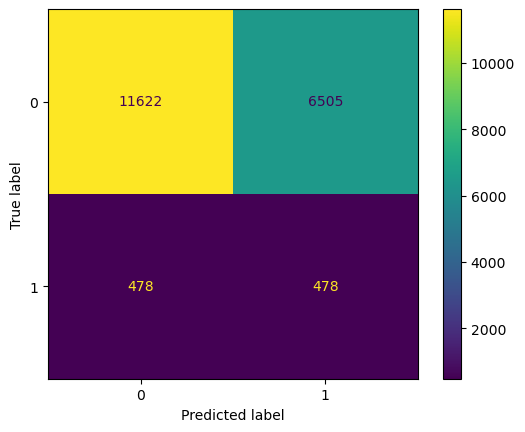

In [23]:
# compare the predicted with the real values
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_test = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

In [24]:
cm_test

array([[11622,  6505],
       [  478,   478]], dtype=int64)

In [25]:
# Wrongly predicted customers that in reality did not donate but model predicted that they will
cm_test[0,1]/(cm_test[0,0]+cm_test[0,1])

0.35885695371545207

In [26]:
# Wrongly predicted people that actually donated
cm_test[1,0]/(cm_test[1,0]+cm_test[1,1])

# False negatives account for half of the actual donors

0.5

## Business discussion

Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative?

In [27]:
y_train_regression
y_test_regression

61921     0.0
7088      0.0
36759     0.0
50419     0.0
39284    15.0
Name: TARGET_D, dtype: float64

In [28]:
# money the company would lose with the false negatives
false_negatives = np.logical_and(y_test == 1, y_pred == 0)
false_negatives_amounts = y_test_regression[false_negatives]
total_false_neg = np.sum(false_negatives_amounts)
total_false_neg

9517.46

In [29]:
# although it's obvious that the money of the false positives is zero, I want to double-check
false_positives = np.logical_and(y_test == 0, y_pred == 1)
false_positives_amounts = y_test_regression[false_positives]
total_false_pos = np.sum(false_positives_amounts)
total_false_pos

0.0

### Discussion

- False positives: people that were predicted to donate but in reality they did not - in principle, no loss for the company. It would affect the predictions of income money as it would expect donors' money that wouldn't come.
- False negative: loss of money from donors that would donate.

## New error metric & GridSearchCV

Sklearn classification models are trained to maximize the accuracy. However, another error metric will be more relevant here. Please checkout
[make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer) alongside with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) in order to train the model to maximize the error metrics of interest in this case.

- Recall: Recall indicates out of all actually positive values, how many are predicted positive. It is a ratio of correct positive predictions to the overall number of positive instances in the dataset.

Recall = Predictions actually positive/Actual positive values in the dataset.

Recall = TP/TP+FN

In [30]:
from sklearn.metrics import make_scorer, recall_score, cohen_kappa_score

recall_sc = make_scorer(recall_score)

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 6],
              'min_samples_split': [15, 20, 25],
              'min_samples_leaf': [15, 20, 25]
              }

# instance
clf = RandomForestClassifier(max_samples=0.8,
                             random_state = 35)

grid_search = GridSearchCV(clf, param_grid, cv = 5, return_train_score=True, n_jobs=4, verbose=20, scoring=recall_sc)
grid_search.fit(X_train, y_train)

# Check best set of parameters
grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 15}

In [32]:
# fit model with best parameter set
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=6,
                             min_samples_split=15,
                             min_samples_leaf =15,
                             max_samples=0.8,
                             random_state = 35)

cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)


In [33]:
print("The mean recall of over the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean recall of over the folds was 0.64


In [34]:
# All the scores of all the folds
cross_val_scores

array([0.65035544, 0.64159017, 0.63896749, 0.64462696, 0.63797626,
       0.6417725 , 0.63825235, 0.64460243, 0.64273882, 0.63928769])

In [35]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test) # this is the accuracy of the model

0.6324477283446

In [36]:
y_pred_new = clf.predict(X_test)

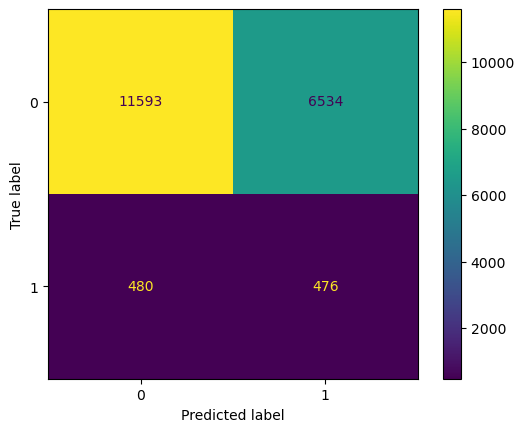

In [37]:
cm_test = confusion_matrix(y_test,y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

In [38]:
print("Recall on the test set is: {:.2f}".format(recall_score(y_test,y_pred_new)))

Recall on the test set is: 0.50


The results are pretty similar as before